In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st


In [2]:
# Loading the dataset.
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
### Task 2

<Axes: xlabel='MEDV'>

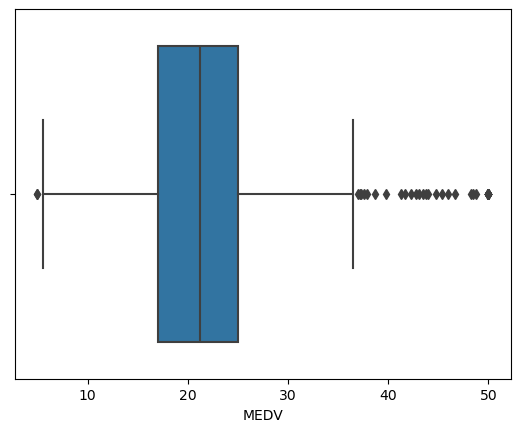

In [7]:
sns.boxplot(x='MEDV',data=boston_df)

In [8]:
boston_df['CHAS'].value_counts()



CHAS
0.0    471
1.0     35
Name: count, dtype: int64

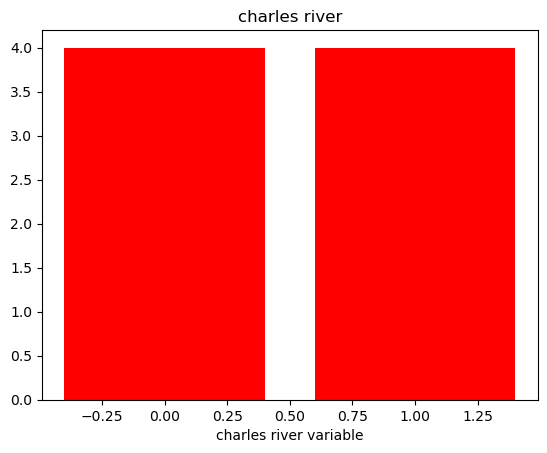

In [10]:
plt.bar(x='CHAS',height=4,data=boston_df,color='red')
plt.xlabel('charles river variable')
plt.title('charles river')
plt.show()

In [12]:
def discretize_age(AGE):
    if AGE <=35:
        return '35 years and younger'
    elif AGE<=70:
        return 'between 35 years and 70 years'
    else:
       return '70 years and older'

boston_df['AGE_GROUP']=boston_df['AGE'].apply(discretize_age)


In [13]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 years and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 years and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 years and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 years and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 years and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


In [16]:
boston_df['AGE_GROUP'].unique()

array(['between 35 years and 70 years', '70 years and older',
       '35 years and younger'], dtype=object)

In [17]:
age_group_1=boston_df[boston_df['AGE_GROUP']=='35 years and younger']
age_group_2=boston_df[boston_df['AGE_GROUP']=='between 35 years and 70 years']
age_group_3=boston_df[boston_df['AGE_GROUP']=='70 years and older']

<Axes: xlabel='MEDV', ylabel='AGE_GROUP'>

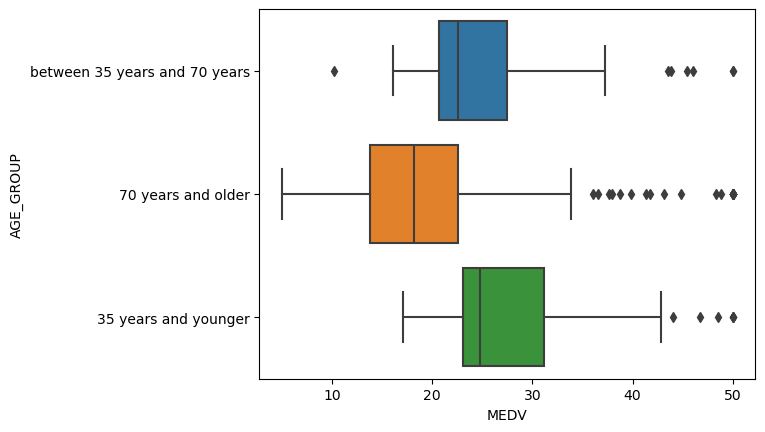

In [18]:
# Box plot for age groups. 
sns.boxplot(x='MEDV',y='AGE_GROUP',data=boston_df)

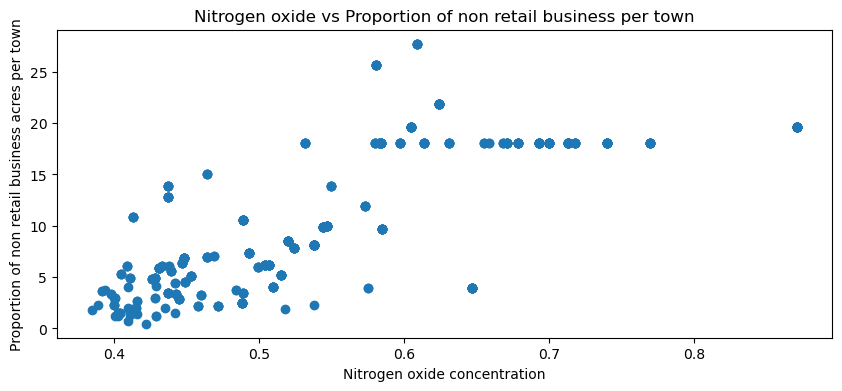

In [20]:
plt.figure(figsize=(10,4))
plt.scatter(x='NOX',y='INDUS',data=boston_df)
plt.xlabel('Nitrogen oxide concentration')
plt.ylabel('Proportion of non retail business acres per town')
plt.title('Nitrogen oxide vs Proportion of non retail business per town')
plt.show()


In [21]:
boston_df.PTRATIO

0      15.3
1      17.8
2      17.8
3      18.7
4      18.7
       ... 
501    21.0
502    21.0
503    21.0
504    21.0
505    21.0
Name: PTRATIO, Length: 506, dtype: float64

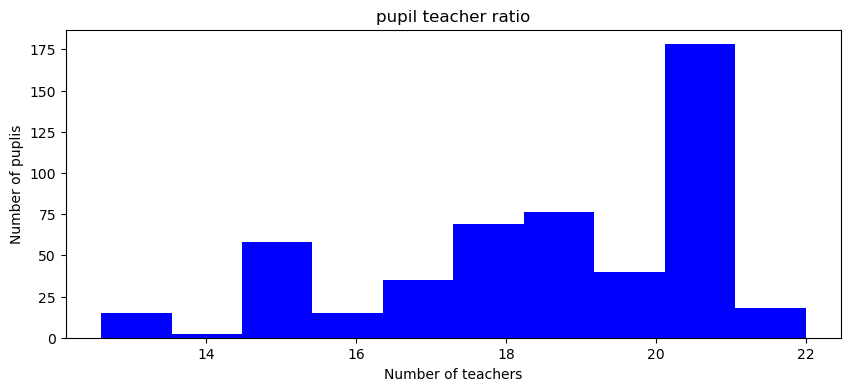

In [24]:
plt.figure(figsize=(10,4))
plt.hist(x='PTRATIO',bins=10,color='blue',data=boston_df)
plt.xlabel('Number of teachers')
plt.ylabel('Number of puplis')
plt.title('pupil teacher ratio')
plt.show()

In [26]:
# Null Hypothesis-Ho-The median values of houses bounded by charles river is same.
# Alternate Hypothesis-h1-The median values of the houses bounded by charles river is different. 

In [27]:
boston_df['CHAS'].unique()

array([0., 1.])

In [28]:
boston_df['MEDV'].value_counts()

MEDV
50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: count, Length: 229, dtype: int64

In [29]:
med_chas_0=boston_df[boston_df['CHAS']==0]['MEDV']
med_chas_1=boston_df[boston_df['CHAS']==1]['MEDV']


In [30]:
# Variance 
# ho-We have the population variance equal.
# h1-Population variance is not equal. 

In [31]:
st.levene(med_chas_0,med_chas_1)
# P value < than alpha(0.05) there fore we reject the null hypothesis. 

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [32]:
st.ttest_ind(med_chas_0,med_chas_1,equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [33]:
# P value is lesser than alpha p value < alpha(0.05) ,we reject the null hypothesis. 
# We can say that median values of the houses bounded by charles river is different. 


In [35]:
boston_df['AGE'].value_counts()

AGE
100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: count, Length: 356, dtype: int64

In [36]:
boston_df['MEDV'].value_counts()

MEDV
50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: count, Length: 229, dtype: int64

In [37]:
# Null hypothesis-Ho-The median values of houses is same for each proportion of owner occupied units built prior to 1940(AGE).
# Alternate hypothesis-h1-The median values of houses is different atleast one proportion of owner occupied units built prior to 1940(AGE).


In [38]:
st.f_oneway(boston_df['MEDV'],boston_df['AGE'])


F_onewayResult(statistic=1223.1740271875933, pvalue=3.20946197250671e-176)

In [39]:
# ho-We have the p value < alpha (0.05) , reject the null hypothesis.
# The median values of houses is different atleast one proportion of owner occupied units built prior to 1940(AGE).

In [40]:
# Ho-There is no relationship between Nox and proportion of non retail business acres.
# h1-There is a relationship between nox and proportion of non retail business acres. 

In [41]:
st.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

In [42]:
# pvalue is < less than alpha (0.05) therefore we reject the null hypothesis.
# There is a relationship between nox and proportion of non retail business acres. 

In [44]:
# ho-There is no additional weighted distance to the five boston employment. 
# h1-There is additional weighted distance to the five boston employement. 

In [45]:
import statsmodels.api as sm

X=boston_df[['DIS']]
y=boston_df['MEDV']

X=sm.add_constant(X)

model=sm.OLS(y,X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        18:01:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Therefore, The p-value for the DIS coefficient is 0.000, which is less than 0.05, 
# indicating that the distance to employment centers significantly impacts the median home value.
